In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import os
os.chdir("C:/Users/oleg/Downloads/PythonData/")

In [6]:
df = pd.read_csv('stonetable.csv', sep=";", decimal=",", encoding='cp1251', header = 0, index_col= False)

In [7]:
df = df.loc[1:]

In [8]:
df


,Территория,Тип керамики,Номер образца,K,Ca,SiO2,Na,K.1,Ca.1,Mg,Ti,Fe
1,О-в Сахалин,Охотский,31,0.05,0.04,0.94,0.48,0.48,0.04,0.01,0.16,0.83
2,О-в Сахалин,Охотский,71,0.05,0.06,0.88,0.45,0.25,0.30,0.02,0.20,0.78
3,О-в Сахалин,Охотский,11,0.16,0.06,0.78,0.40,0.43,0.17,0.03,0.13,0.83
4,О-в Сахалин,Охотский,131,0.20,0.05,0.75,0.54,0.37,0.09,0.00,0.14,0.86
5,О-в Сахалин,Охотский,141,0.09,0.01,0.89,0.43,0.50,0.08,0.03,0.12,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...
75,Г. Есаши,Охотский,16,0.27,0.26,0.47,0.57,0.22,0.21,0.26,0.15,0.59
76,Г. Есаши,Охотский,22,0.14,0.53,0.33,0.41,0.12,0.47,0.32,0.20,0.48
77,Г. Есаши,Охотский,35,0.15,0.63,0.22,0.56,0.09,0.35,0.11,0.33,0.56
78,Г. Есаши,Охотский,61,0.15,0.56,0.29,0.52,0.10,0.37,0.37,0.26,0.37


In [9]:
df.dtypes


Территория        object
Тип керамики      object
Номер образца     object
K                float64
Ca               float64
SiO2             float64
Na               float64
K.1              float64
Ca.1             float64
Mg               float64
Ti               float64
Fe               float64
dtype: object

In [10]:
df1 = df.drop('Номер образца', axis=1)
df1.head()

,Территория,Тип керамики,K,Ca,SiO2,Na,K.1,Ca.1,Mg,Ti,Fe
1,О-в Сахалин,Охотский,0.05,0.04,0.94,0.48,0.48,0.04,0.01,0.16,0.83
2,О-в Сахалин,Охотский,0.05,0.06,0.88,0.45,0.25,0.30,0.02,0.20,0.78
3,О-в Сахалин,Охотский,0.16,0.06,0.78,0.40,0.43,0.17,0.03,0.13,0.83
4,О-в Сахалин,Охотский,0.20,0.05,0.75,0.54,0.37,0.09,0.00,0.14,0.86
5,О-в Сахалин,Охотский,0.09,0.01,0.89,0.43,0.50,0.08,0.03,0.12,0.85


In [11]:
y1 = df1['Территория']
y2 = df1['Тип керамики']
y = df1[['Территория', 'Тип керамики']]
X = df1.drop('Территория', axis=1)
X = X.drop('Тип керамики', axis=1)

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель
model1 = DecisionTreeClassifier(random_state=34,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='entropy',
                               # максимальная глубина дерева
                               max_depth=5,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=5,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5,
                               # минимальное значение дельты impurity
                               # min_impurity_decrease=0,
                               # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None,
                               # предварительная сортировка.
                               # ускоряет обучение на данных небольшого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               presort=True
                              )
model2 = DecisionTreeClassifier(random_state=34,
                               criterion='entropy',
                               max_depth=5,
                               min_samples_split=5,
                               min_samples_leaf=5,
                               class_weight=None,
                               presort=True
                              )
model = DecisionTreeClassifier(random_state=34,
                               criterion='entropy',
                               max_depth=5,
                               min_samples_split=5,
                               min_samples_leaf=5,
                               class_weight=None,
                               presort=True
                              )


In [13]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, random_state=34, test_size=0.4)
model1.fit(X1_train, y1_train)


C:\Users\oleg\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=34, splitter='best')

In [14]:

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, random_state=34, test_size=0.4)
model2.fit(X2_train, y2_train)

C:\Users\oleg\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=34, splitter='best')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34, test_size=0.4)
model.fit(X_train, y_train)

C:\Users\oleg\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=34, splitter='best')

In [18]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(model1,
                out_file='tree1.dot',
                # задать названия фич
                # feature_names=X.columns,
                class_names=None,
                # показывать названия полей у численных значений внутри узла
                label='all',
                # раскрашивать узлы в цвет преобладающего класса
                filled=True,
                # показывать значение impurity для каждого узла
                impurity=True,
                # показывать номера узлов
                node_ids=True,
                # Показывать доли каждого класса в узлах (а не количество)
                proportion=True,
                # Повернуть дерево на 90 градусов (вертикальная ориентация)
                rotate=True,
                # Число точек после запятой для отображаемых дробей
                # precision=3
               )

export_graphviz(model2,
                out_file='tree2.dot',
                # задать названия фич
                # feature_names=X.columns,
                class_names=None,
                # показывать названия полей у численных значений внутри узла
                label='all',
                # раскрашивать узлы в цвет преобладающего класса
                filled=True,
                # показывать значение impurity для каждого узла
                impurity=True,
                # показывать номера узлов
                node_ids=True,
                # Показывать доли каждого класса в узлах (а не количество)
                proportion=True,
                # Повернуть дерево на 90 градусов (вертикальная ориентация)
                rotate=True,
                # Число точек после запятой для отображаемых дробей
                # precision=3
               )
export_graphviz(model,
                out_file='tree.dot',
                # задать названия фич
                # feature_names=X.columns,
                class_names=None,
                # показывать названия полей у численных значений внутри узла
                label='all',
                # раскрашивать узлы в цвет преобладающего класса
                filled=True,
                # показывать значение impurity для каждого узла
                impurity=True,
                # показывать номера узлов
                node_ids=True,
                # Показывать доли каждого класса в узлах (а не количество)
                proportion=True,
                # Повернуть дерево на 90 градусов (вертикальная ориентация)
                rotate=True,
                # Число точек после запятой для отображаемых дробей
                # precision=3
               )

In [19]:
Image("tree1.png")
#Территория

FileNotFoundError: No such file or directory: 'tree1.png'

FileNotFoundError: No such file or directory: 'tree1.png'

<IPython.core.display.Image object>

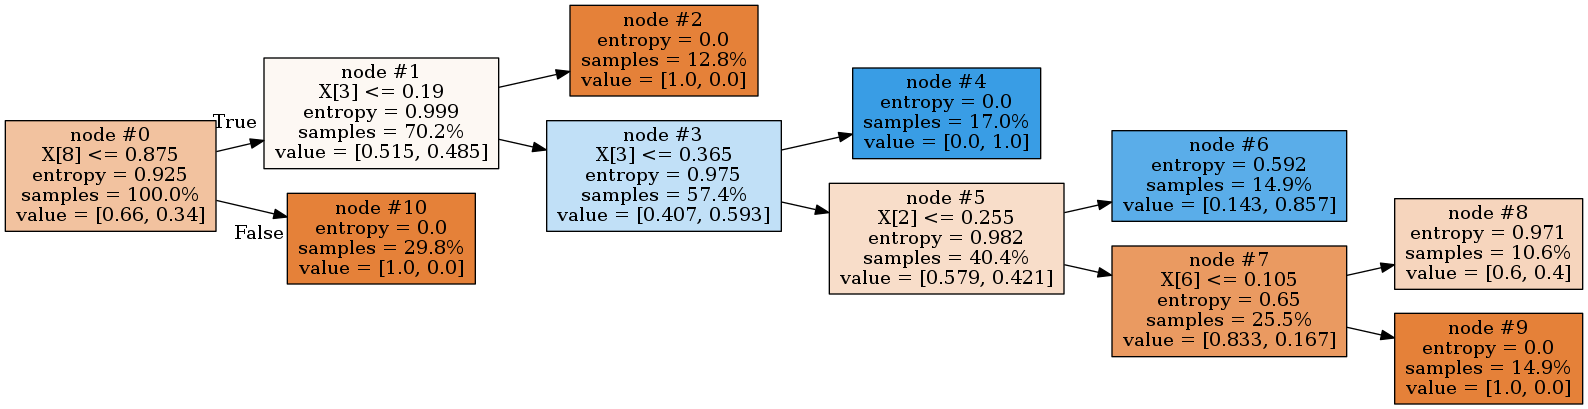

In [14]:
Image("tree2.png")
#Тип керамики

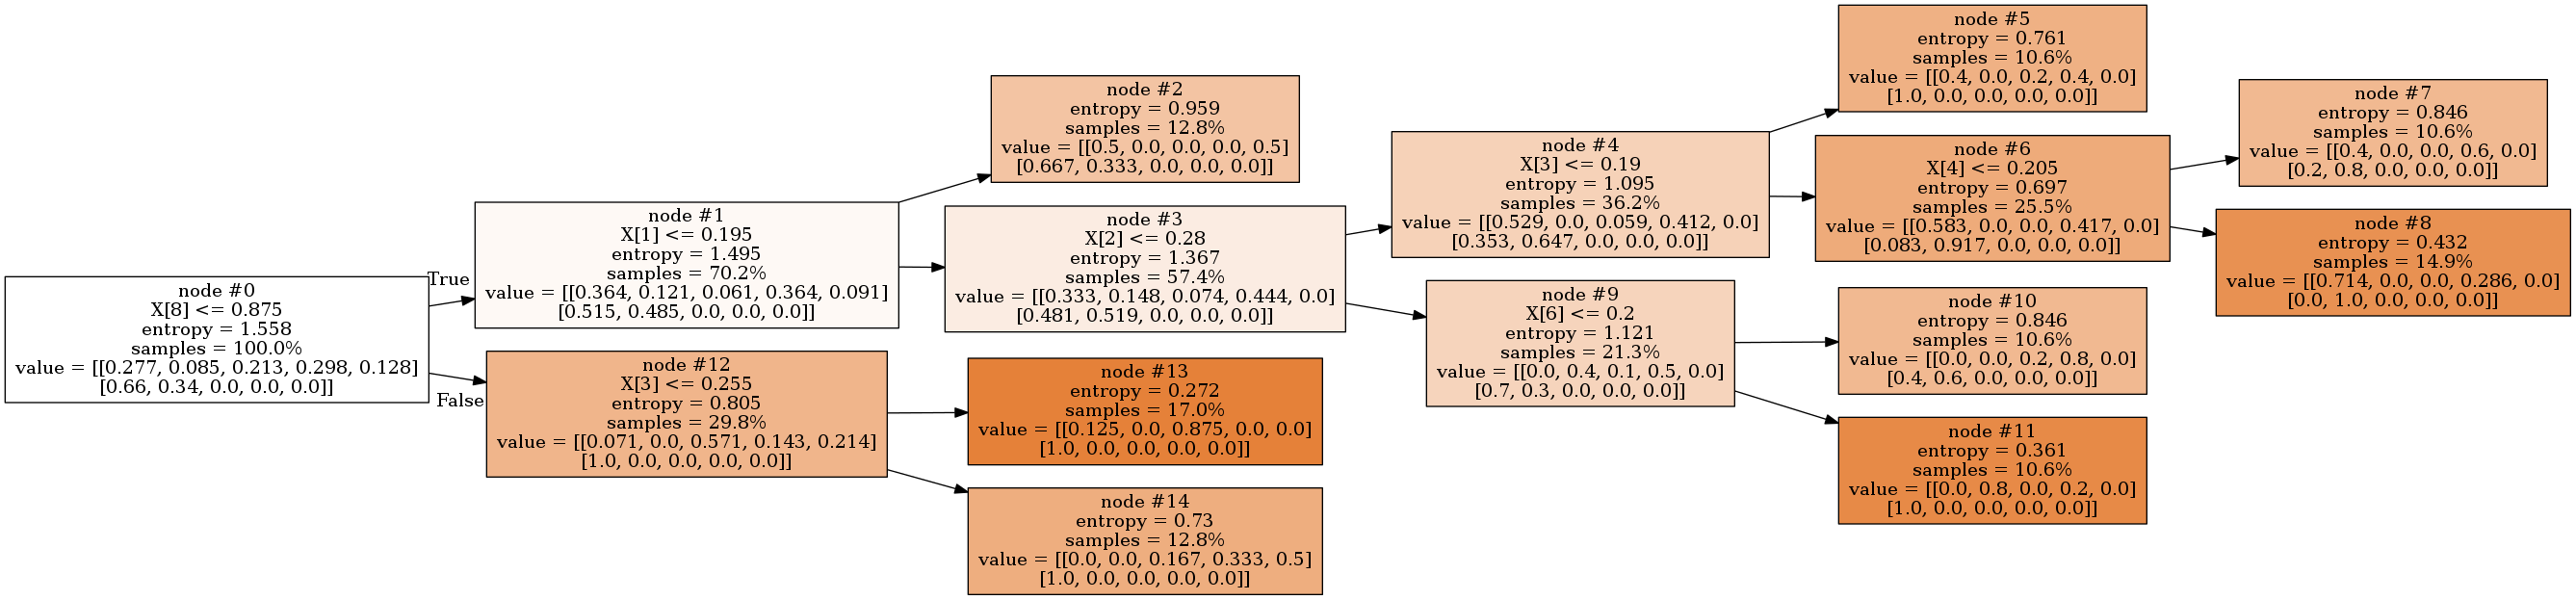

In [15]:
Image("tree.png")

In [16]:
pd.DataFrame({'feature': X.columns,
              'importance': model1.feature_importances_}).sort_values('importance', ascending=False)
#Территория

,feature,importance
2,SiO2,0.379511
6,Mg,0.323708
8,Fe,0.126760
3,Na,0.110155
4,K.1,0.059865
0,K,0.000000
1,Ca,0.000000
5,Ca.1,0.000000
7,Ti,0.000000


In [17]:
pd.DataFrame({'feature': X.columns,
              'importance': model2.feature_importances_}).sort_values('importance', ascending=False)
#Тип керамики

,feature,importance
3,Na,0.415240
8,Fe,0.304660
2,SiO2,0.194696
6,Mg,0.085404
0,K,0.000000
1,Ca,0.000000
4,K.1,0.000000
5,Ca.1,0.000000
7,Ti,0.000000


In [18]:
pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)


,feature,importance
8,Fe,0.287823
3,Na,0.254995
2,SiO2,0.161561
1,Ca,0.152185
6,Mg,0.118120
4,K.1,0.025317
0,K,0.000000
5,Ca.1,0.000000
7,Ti,0.000000


In [19]:
y1_pred = model1.predict(X1_test)

y2_pred = model2.predict(X2_test)

y_pred = model.predict(X_test)


In [20]:
df1_ = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df1_

,Actual,Predicted
23,Г. Вакканай,О-в Ребун
28,Г. Вакканай,Г. Вакканай
8,О-в Сахалин,О-в Сахалин
60,О-в Ребун,О-в Ребун
49,О-в Рисири,Г. Вакканай
45,О-в Рисири,Г. Есаши
71,О-в Ребун,О-в Рисири
40,О-в Рисири,О-в Рисири
1,О-в Сахалин,О-в Сахалин
18,Г. Вакканай,О-в Рисири


In [21]:
df2_ = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
df2_

,Actual,Predicted
23,Охотский,Охотский
28,Сусуйский,Охотский
8,Охотский,Охотский
60,Охотский,Охотский
49,Сусуйский,Охотский
45,Охотский,Охотский
71,Охотский,Охотский
40,Охотский,Охотский
1,Охотский,Охотский
18,Охотский,Охотский


In [22]:
from sklearn import metrics
conf_mat1 = metrics.confusion_matrix(y1_test, y1_pred)
conf_mat1 = pd.DataFrame(conf_mat1, index=model1.classes_, columns=model1.classes_)
conf_mat1

,Г. Вакканай,Г. Есаши,О-в Ребун,О-в Рисири,О-в Сахалин
Г. Вакканай,2,0,2,4,0
Г. Есаши,0,2,0,0,0
О-в Ребун,0,0,4,3,1
О-в Рисири,1,2,0,2,0
О-в Сахалин,0,0,0,0,9


In [23]:
conf_mat2 = metrics.confusion_matrix(y2_test, y2_pred)
conf_mat2 = pd.DataFrame(conf_mat2, index=model2.classes_, columns=model2.classes_)
conf_mat2

,Охотский,Сусуйский
Охотский,20,5
Сусуйский,5,2


In [24]:
print(metrics.classification_report(y1_pred, y1_test))

              precision    recall  f1-score   support

 Г. Вакканай       0.25      0.67      0.36         3
    Г. Есаши       1.00      0.50      0.67         4
   О-в Ребун       0.50      0.67      0.57         6
  О-в Рисири       0.40      0.22      0.29         9
 О-в Сахалин       1.00      0.90      0.95        10

    accuracy                           0.59        32
   macro avg       0.63      0.59      0.57        32
weighted avg       0.67      0.59      0.60        32



In [25]:
print(metrics.classification_report(y2_pred, y2_test))

              precision    recall  f1-score   support

    Охотский       0.80      0.80      0.80        25
   Сусуйский       0.29      0.29      0.29         7

    accuracy                           0.69        32
   macro avg       0.54      0.54      0.54        32
weighted avg       0.69      0.69      0.69        32



In [37]:
y_pred_ = y_pred.sum(1)
y_pred_

array(['О-в РебунОхотский', 'Г. ЕсашиОхотский', 'О-в СахалинОхотский',
       'О-в РебунОхотский', 'О-в РисириСусуйский', 'Г. ЕсашиОхотский',
       'Г. ВакканайОхотский', 'О-в РисириСусуйский',
       'Г. ВакканайОхотский', 'О-в СахалинОхотский',
       'Г. ВакканайОхотский', 'О-в СахалинОхотский',
       'О-в РисириСусуйский', 'Г. ВакканайОхотский',
       'О-в РисириСусуйский', 'Г. ВакканайОхотский',
       'О-в РисириСусуйский', 'Г. ВакканайОхотский',
       'О-в РисириСусуйский', 'О-в РисириСусуйский',
       'Г. ВакканайОхотский', 'О-в РебунОхотский', 'О-в РисириСусуйский',
       'Г. ВакканайОхотский', 'Г. ВакканайОхотский',
       'О-в СахалинОхотский', 'Г. ВакканайОхотский',
       'Г. ВакканайОхотский', 'О-в СахалинОхотский', 'О-в РебунОхотский',
       'О-в РебунОхотский', 'Г. ВакканайОхотский'], dtype=object)

In [38]:
y_test_ = y_test.sum(1)
y_test_.count()

32

In [45]:
conf_mat = metrics.confusion_matrix(y_test_, y_pred_)
conf_mat = pd.DataFrame(conf_mat)
conf_mat

,0,1,2,3,4,5,6,7,8
0,1,0,0,2,0,0,1,1,0
1,0,0,1,0,0,0,1,1,0
2,0,0,0,0,0,0,2,0,0
3,4,0,0,3,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,2,1,0
6,0,0,0,0,0,0,1,0,0
7,5,0,0,0,0,0,0,2,0
8,2,0,0,0,0,0,0,0,0


In [42]:
print(metrics.classification_report(y_pred_, y_test_))

                      precision    recall  f1-score   support

 Г. ВакканайОхотский       0.20      0.08      0.12        12
Г. ВакканайСусуйский       0.00      0.00      0.00         0
    Г. ЕсашиОхотский       0.00      0.00      0.00         2
   О-в РебунОхотский       0.43      0.60      0.50         5
  О-в РебунСусуйский       0.00      0.00      0.00         0
  О-в РисириОхотский       0.00      0.00      0.00         0
 О-в РисириСусуйский       1.00      0.12      0.22         8
 О-в СахалинОхотский       0.29      0.40      0.33         5
О-в СахалинСусуйский       0.00      0.00      0.00         0

            accuracy                           0.22        32
           macro avg       0.21      0.13      0.13        32
        weighted avg       0.44      0.22      0.23        32



E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
